In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:


SHOPIFY_STORE = "https://candyfunhouse.ca"
API_ENDPOINT = f"{SHOPIFY_STORE}/products.json"

response = requests.get(API_ENDPOINT)
data = response.json()


products = []
for product in data["products"]:
    name = product["title"]
    price = product["variants"][0]["price"]
    link = f"{SHOPIFY_STORE}/products/{product['handle']}"
    products.append({"Name": name, "Price": float(price), "Link": link})


df = pd.DataFrame(products)
df.to_csv("candyfunhouse_products.csv", index=False)


In [13]:


print("\nPrice Statistics:")
print(df["Price"].describe())



Price Statistics:
count    30.000000
mean     12.706667
std      13.800727
min       2.990000
25%       4.490000
50%       6.490000
75%      14.990000
max      49.990000
Name: Price, dtype: float64


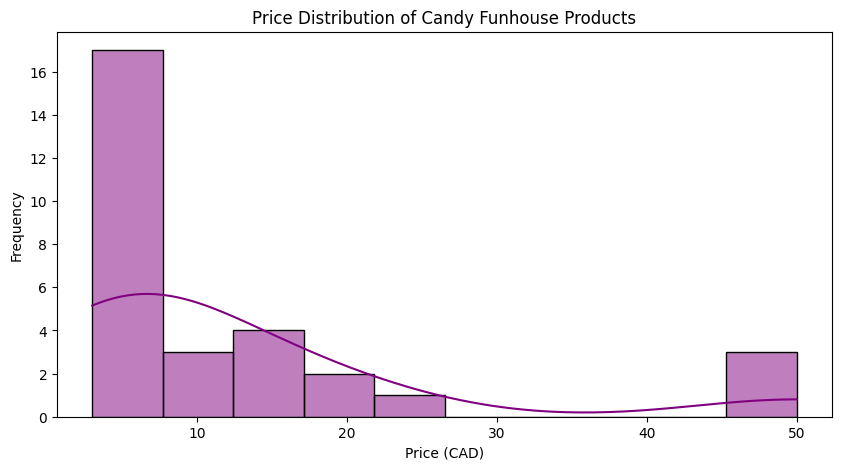

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=10, kde=True, color="purple")
plt.title("Price Distribution of Candy Funhouse Products")
plt.xlabel("Price (CAD)")
plt.ylabel("Frequency")
plt.savefig("candyfunhouse_price_distribution.png")
plt.show()

In [15]:
most_expensive = df.loc[df["Price"].idxmax()]
print("\nMost Expensive Product:")
print(most_expensive)


Most Expensive Product:
Name      Valentine M&M's Milk Chocolate Cupid's Mix - 3lb
Price                                                49.99
Link     https://candyfunhouse.ca/products/m-ms-milk-ch...
Name: 3, dtype: object


In [19]:

print("\nPrice Statistics:")
stats = df["Price"].describe()
print(stats)



Price Statistics:
count    30.000000
mean     12.706667
std      13.800727
min       2.990000
25%       4.490000
50%       6.490000
75%      14.990000
max      49.990000
Name: Price, dtype: float64


In [20]:
median_price = df["Price"].median()
price_skew = df["Price"].skew()
price_range = df["Price"].max() - df["Price"].min()
print(f"\nAdditional Metrics:")
print(f"Median Price: ${median_price:.2f}")
print(f"Price Skewness: {price_skew:.2f} (positive = right-skewed)")
print(f"Price Range: ${price_range:.2f}")





Additional Metrics:
Median Price: $6.49
Price Skewness: 2.08 (positive = right-skewed)
Price Range: $47.00


# Insights from Scraped Data

Total Products Scraped: 30

Average Price: $12.71 CAD

Cheapest Item: $2.99 CAD

Most Expensive Item: $49.99 CAD

Median Price: $6.49 CAD

Price Distribution:

25% of products cost less than $4.49 CAD

50% of products cost $6.49 CAD or less

75% of products cost $14.99 CAD or less

🔹 Additional Observations

The majority of products fall within the $5 - $15 CAD range.

A small percentage of premium products are priced above $20 CAD.

The highest-priced product ($49.99 CAD) could be a gift box or special edition item.